# HW 1: Basic Bayesian Decisions

## Make sure to run the below code

In [1]:
# for inline plots in jupyter
%matplotlib inline
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

In [2]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib 

''' Importing sys and running sys.executable ensures that we are 
    installing the libraries with this specific python kernel '''


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


' Importing sys and running sys.executable ensures that we are \n    installing the libraries with this specific python kernel '

In [3]:
'''import required libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question 1: mean, stddev, sampleMean and covariance

These methods are implemented in util.py, included here as well

Here are some helpful equations:

### How to calculate mean

$ \hat{\mu} = \frac{\Sigma_{i=1}^{N} x_i}{N} $


### How to calculate standard deviation

$ \hat{\sigma} = \frac{\sqrt{\Sigma_{i=1}^{N} (x_i - \hat{\mu})^2 }}{\sqrt{N}} $


In [4]:
'''these methods are implemented in util.py, included here as well'''
def mean(np_array):
    '''Your code here'''
    sum = 0
    n_samples = 0
    for value in np_array:
        sum += value
        n_samples += 1
    ans = sum/n_samples
    '''Stop coding here'''    
    return ans

def stdev(np_array, mu=None):
    '''Your code here'''
    if mu == None:
        mu = mean(np_array)
    n_samples = len(np_array)
    variance = 0
    for value in np_array:
        variance += (value - mu) ** 2
    variance /= n_samples
    ans = variance ** 0.5
    '''Stop coding here'''    
    return ans

def sampleMean(np_array):
    ''' Each column represents a feature'''
    '''Your code here'''
    ans = []
    n_samples = len(np_array)
    n_features = len(np_array[0])
    for j in range(n_features):
        col_sum = 0
        for i in range(n_samples):
            col_sum += np_array[i][j]
        col_mean = col_sum/n_samples 
        ans.append(col_mean)
    '''Stop coding here'''    
    return ans

def covariance(np_array):
    ''' Each column represents a feature'''
    '''Your code here'''
    n_samples = len(np_array)
    n_features = len(np_array[0])  # Number of features
    feature_means = sampleMean(np_array)
    ans = [[0 for _ in range(n_features)] for _ in range(n_features)]
    for i in range(n_features):
        for j in range(n_features):
            sum = 0
            for k in range(n_samples):
                sum += (np_array[k][i] - feature_means[i]) * (np_array[k][j] - feature_means[j])
            ans[i][j] = sum/(n_samples - 1)
            # Divide by (n-1) for sample covariance
    '''Stop coding here'''    
    return ans

#### Validating the methods with the pre-defined methods of numpy library

In [5]:
'''importing util.py to use the methods defined in it'''
import util

Generating sample data from a normal distribution for validation 

In [6]:
'''We can sample from a normal distribution using np.random.normal'''
mu, sigma = 60, 5 # mean and standard deviation
sample_data = np.random.normal(mu, sigma, 1000)
display(sample_data)
print("Sample Data generated:", len(sample_data), " or using shape method: ", sample_data.shape[0])

array([54.28612167, 66.02244879, 67.65581353, 62.64068859, 60.4416365 ,
       60.53882976, 45.81354242, 63.57551804, 62.79513144, 51.0925705 ,
       57.20734082, 58.11929694, 57.93949606, 60.43267357, 56.11824088,
       58.09700584, 61.47310179, 54.72843311, 58.54183717, 57.12261011,
       57.15934166, 69.80244015, 57.1215834 , 56.38276953, 57.68422322,
       53.13306731, 52.19821195, 61.77797966, 63.91413715, 54.69806376,
       61.68303661, 55.27914794, 61.32347706, 69.28715569, 60.97049305,
       58.96809782, 58.08425433, 65.92776724, 59.72674627, 63.15202035,
       60.85059022, 62.02705729, 66.33103347, 54.26536606, 73.34464742,
       70.08039824, 63.554124  , 59.30841529, 55.55691483, 67.16598759,
       59.45979801, 60.60868347, 65.19329296, 64.00102047, 60.24989815,
       67.95986605, 67.5286708 , 66.14066464, 56.09794196, 59.65650517,
       58.07631203, 63.7079165 , 56.29382218, 57.37793337, 61.60510487,
       53.25482768, 57.10929188, 61.07516   , 63.13224646, 56.90

Sample Data generated: 1000  or using shape method:  1000


#### Validating defined methods against the corresponding numpy functions

In [7]:
actual_mean = np.mean(sample_data)
calculated_mean = util.mean(sample_data)

In [8]:
print("Mean using numpy method: ", actual_mean)
print("Calculated Mean: ", calculated_mean)

Mean using numpy method:  60.02092821856961
Calculated Mean:  60.02092821856968


In [9]:
actual_std = np.std(sample_data)
calculated_std = util.stdev(sample_data)

In [10]:
print("Standard deviation using numpy method: ", actual_std)
print("Calculated standard deviation: ", calculated_std)

Standard deviation using numpy method:  4.876003163774144
Calculated standard deviation:  4.876003163774145


In [11]:
actual_std = np.std(sample_data)
calculated_std = util.stdev(sample_data, mu = actual_mean)

In [12]:
print("Standard deviation using numpy method: ", actual_std)
print("Calculated standard deviation: ", calculated_std)

Standard deviation using numpy method:  4.876003163774144
Calculated standard deviation:  4.8760031637741434


Generating 2D data to validate sample mean and covariance

In [13]:
mu, sigma = 60, 5 # mean and standard deviation
sample_data_2d = np.random.normal(mu, sigma, (1000,5))
display(sample_data_2d)
print("Sample Data generated:", len(sample_data_2d), " or using shape method: ", sample_data_2d.shape[0])

array([[62.67373503, 52.41308923, 59.64017581, 57.87969494, 61.64131036],
       [65.90661548, 58.09324772, 53.93012423, 58.6164593 , 49.60821156],
       [60.89988953, 57.83800632, 55.21040534, 59.48855868, 55.03171512],
       ...,
       [60.01792808, 61.17010965, 62.90830388, 54.63698904, 61.26590681],
       [57.63841666, 65.55116487, 60.72336583, 59.34480334, 55.64038851],
       [59.79824294, 51.94846371, 61.838903  , 49.02229739, 62.55990394]])

Sample Data generated: 1000  or using shape method:  1000


In [14]:
actual_sampleMean = np.mean(sample_data_2d, axis = 0)
calculated_sampleMean = util.sampleMean(sample_data_2d)

In [15]:
display("Sample Mean using numpy method: ", actual_sampleMean)
display("Calculated sample mean: ", calculated_sampleMean)

'Sample Mean using numpy method: '

array([59.93041155, 59.91734157, 59.89910826, 60.05027132, 59.88857426])

'Calculated sample mean: '

[np.float64(59.93041154910825),
 np.float64(59.91734157330744),
 np.float64(59.899108264016355),
 np.float64(60.050271318675996),
 np.float64(59.88857426403974)]

In [16]:
actual_covariance = np.cov(sample_data_2d, rowvar=False)
calculated_covariance = util.covariance(sample_data_2d)

In [17]:
display("Covariance using numpy method: ", actual_covariance)
display("Calculated covariance: ", calculated_covariance)

'Covariance using numpy method: '

array([[25.70054896,  2.441946  , -0.60237273,  0.25003467,  0.07599958],
       [ 2.441946  , 25.39424135, -0.86047544, -1.11427829, -0.36798139],
       [-0.60237273, -0.86047544, 25.01970015, -0.11491812, -0.70003164],
       [ 0.25003467, -1.11427829, -0.11491812, 25.45100474, -0.25436359],
       [ 0.07599958, -0.36798139, -0.70003164, -0.25436359, 23.41820486]])

'Calculated covariance: '

[[np.float64(25.70054896276389),
  np.float64(2.4419460033493876),
  np.float64(-0.6023727340751674),
  np.float64(0.25003467301069304),
  np.float64(0.07599957758215091)],
 [np.float64(2.4419460033493876),
  np.float64(25.394241349904703),
  np.float64(-0.860475444068789),
  np.float64(-1.1142782873750465),
  np.float64(-0.36798138745258113)],
 [np.float64(-0.6023727340751674),
  np.float64(-0.860475444068789),
  np.float64(25.019700154372075),
  np.float64(-0.1149181181468214),
  np.float64(-0.7000316414259543)],
 [np.float64(0.25003467301069304),
  np.float64(-1.1142782873750465),
  np.float64(-0.1149181181468214),
  np.float64(25.451004735545062),
  np.float64(-0.25436359045238716)],
 [np.float64(0.07599957758215091),
  np.float64(-0.36798138745258113),
  np.float64(-0.7000316414259543),
  np.float64(-0.25436359045238716),
  np.float64(23.418204859941362)]]

### Question 2: Priors Class

The Prior Classifier is implemeted in classifiers.py. Adding it in the below cells again

In [18]:
class Classifier:
    ''' This is a class prototype for any classifier. It contains two empty methods: predict, fit'''
    def __init__(self):
        pass
    
    def predict(self, x):
        '''This method takes in x (numpy array) and returns a prediction y'''
        pass
    
    def fit(self, *data):
        '''This method is used for fitting a model to data: x, y'''
        pass

In [19]:
class Prior_here(Classifier):
    
    def __init__(self):
        ''' Your code here '''
        self.model_params = {}
        pass
    
    def predict(self, x):
        '''This method takes in x (numpy array) and returns a prediction y'''
        '''Since the input is an array of samples, the '''
        if not self.model_params:
            raise ValueError("The model has not been fitted yet. Call fit() before predict().")
        decision_label = None
        max_value = float('-inf')
        for key, value in self.model_params.items():
            if value > max_value:
                max_value = value
                decision_label = key
        return [decision_label] * len(x)
    
    
    def fit(self, x, y):
        '''This method is used for fitting a model to data: x (numpy array), y (numpy array)'''
        label_counts = {}
        for label in y:
            label_counts[label] = label_counts.get(label, 0) + 1
        n_samples = len(y)
        for label,count in label_counts.items():
            self.model_params[label] = count / n_samples 

In [20]:
'''importing Prior class from classifiers.py'''
from classifiers import Prior

#### Create a pandas dataframe with one feature column (“Heart-Rate”) and one class column with 1,000 total samples. The class column should contain two classes (“Stress” and ”Not Stress”) with 430 samples corresponding to “Stress”. The average heart-rate data for “Stress” should be 110 and the average heart-rate data for ”Not Stress” should be 65.

In [21]:
'''Create a dataset with labels'''
mu, sigma = 65, 5 # mean and standard deviation
notStress_hr = np.random.normal(mu, sigma, 570)

mu, sigma = 110, 5 # mean and standard deviation
stress_hr = np.random.normal(mu, sigma, 430)

''' Create a Pandas Dataframe with X data'''
hrDf = pd.DataFrame(np.hstack((notStress_hr, stress_hr)), columns=['Heart-Rate'])

''' Create a List with labels for each sample'''
li = ['Not Stress' for x in range(0,570)]
li.extend(['Stress' for x in range(0,430)]) # .extend is an inplace method that adds each item in a list to a list

''' Create a new column (labels) and set that equal to the list '''
hrDf['Labels'] = li

display(hrDf)

,Heart-Rate,Labels
0,59.416781,Not Stress
1,58.696307,Not Stress
2,55.970410,Not Stress
3,68.043193,Not Stress
4,69.002507,Not Stress
...,...,...
995,112.038988,Stress
996,119.877398,Stress
997,109.181555,Stress
998,105.459842,Stress


#### Use the pandas groupby and describe methods to ensure the dataframe has the expected characteristics (e.g., 430 samples of ”Stress” with an average value of 110).

dict_keys(['Not Stress', 'Stress'])

Number of samples in the Stress class:


430

Number of samples in the Not Stress class:


570

Heart-Rate                                               \
                count        mean       std        min         25%   
Labels                                                               
Not Stress      570.0   64.688524  5.204152  47.449303   61.156007   
Stress          430.0  110.288293  5.187398  94.904664  106.862653   

                                                
                   50%         75%         max  
Labels                                          
Not Stress   64.671475   68.017825   80.173596  
Stress      110.384197  113.808531  124.433717

Labels
Not Stress    Axes(0.125,0.11;0.775x0.77)
Stress        Axes(0.125,0.11;0.775x0.77)
Name: Heart-Rate, dtype: object

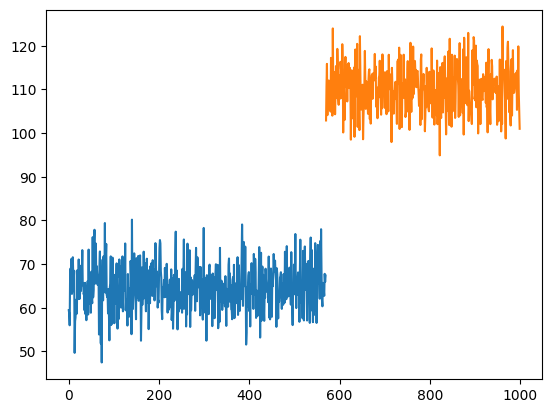

In [22]:
''' Fun dataset operations with groupby '''

''' We can get the dictionary keys for each group'''
display(hrDf.groupby('Labels').groups.keys())

''' We can also get a total count of samples in a group'''
print("Number of samples in the Stress class:")
display(len(hrDf.groupby('Labels').get_group('Stress')))
print("Number of samples in the Not Stress class:")
display(len(hrDf.groupby('Labels').get_group('Not Stress')))

''' Here are useful statistics'''
display(hrDf.groupby('Labels').describe()) # Ensure that the mean and std match what we put above


''' We can plot dataframes as well'''
hrDf.groupby('Labels')['Heart-Rate'].plot()

##### Fit the Prior Classifier to the data 

In [27]:
''' Create the classifier, fit to hrDf and view the priors'''
clf_1 = Prior()
clf_1.fit(hrDf['Heart-Rate'].values, hrDf['Labels'].values)
display(clf_1.model_params)

{'Not Stress': 0.57, 'Stress': 0.43}

#### Test your Prior Classifier with this dataframe and ensure the predict function works as expected for inputs ranging from 40 to 140. (Hint: It may be useful to use Matplotlib and plot the predictions for this range).

' The plot should have one straight line of just Not-stress'

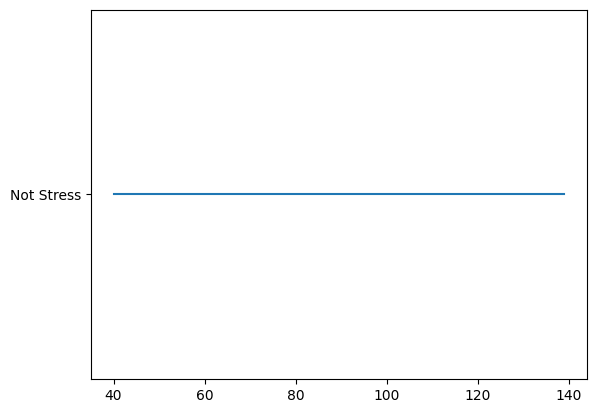

In [28]:
import matplotlib.pyplot as plt
'''Time to plot your predictions'''
x = [x for x in range(40,140)]
predictions = clf_1.predict(x)
plt.plot([n for n in range(40,140)], predictions)

''' The plot should have one straight line of just Not-stress'''

#### Another example to check if it works for more than two classes

##### Weights of animals - cat, dog, horse and elephant (labels)

In [29]:
mu_cat, sigma_cat = 4, 1
mu_dog, sigma_dog = 20, 5
mu_horse, sigma_horse = 200, 50
mu_elephant, sigma_elephant = 5000, 500

In [30]:
cat_weight = np.random.normal(mu_cat, sigma_cat, 300)
dog_weight = np.random.normal(mu_dog, sigma_dog, 400)
horse_weight = np.random.normal(mu_horse, sigma_horse, 300)
elephant_weight = np.random.normal(mu_elephant, sigma_elephant, 200)

df = pd.DataFrame(np.hstack((cat_weight, dog_weight, horse_weight, elephant_weight)), columns=['Weight'])

li = ['Cat' for x in range(0,300)]
li.extend(['Dog' for x in range(0,400)]) 
li.extend(['Horse' for x in range(0,300)])
li.extend(['Elephant' for x in range(0, 200)])

''' Create a new column (labels) and set that equal to the list '''
df['Animal'] = li

display(df)

,Weight,Animal
0,4.117527,Cat
1,4.568951,Cat
2,3.268968,Cat
3,3.864154,Cat
4,3.443911,Cat
...,...,...
1195,4569.043650,Elephant
1196,5243.573861,Elephant
1197,4985.114022,Elephant
1198,5169.870877,Elephant


dict_keys(['Cat', 'Dog', 'Elephant', 'Horse'])

Number of samples in the Cat class:


300

Number of samples in the Dog class:


400

Number of samples in the Horse class:


300

Number of samples in the Elephant class:


200

Weight                                                     \
          count         mean         std          min          25%   
Animal                                                               
Cat       300.0     4.018896    0.982019     0.831480     3.318441   
Dog       400.0    19.991883    5.056718     7.138198    16.372219   
Elephant  200.0  4977.319749  532.304805  3369.694094  4596.721888   
Horse     300.0   201.629971   50.336854    67.551873   170.520602   

                                                 
                  50%          75%          max  
Animal                                           
Cat          4.005905     4.660674     6.794025  
Dog         19.803983    23.383652    35.890098  
Elephant  4993.344889  5322.138299  6775.540365  
Horse      201.660809   239.653070   322.014469

Animal
Cat         Axes(0.125,0.11;0.775x0.77)
Dog         Axes(0.125,0.11;0.775x0.77)
Elephant    Axes(0.125,0.11;0.775x0.77)
Horse       Axes(0.125,0.11;0.775x0.77)
Name: Weight, dtype: object

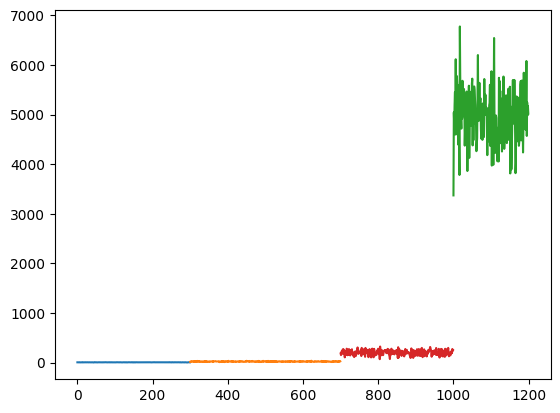

In [31]:
''' Fun dataset operations with groupby '''

''' We can get the dictionary keys for each group'''
display(df.groupby('Animal').groups.keys())

''' We can also get a total count of samples in a group'''
print("Number of samples in the Cat class:")
display(len(df.groupby('Animal').get_group('Cat')))
print("Number of samples in the Dog class:")
display(len(df.groupby('Animal').get_group('Dog')))
print("Number of samples in the Horse class:")
display(len(df.groupby('Animal').get_group('Horse')))
print("Number of samples in the Elephant class:")
display(len(df.groupby('Animal').get_group('Elephant')))

''' Here are useful statistics'''
display(df.groupby('Animal').describe()) # Ensure that the mean and std match what we put above


''' We can plot dataframes as well'''
df.groupby('Animal')['Weight'].plot()

In [32]:
''' Create the classifier, fit to df and view the priors'''
clf_2 = Prior()
clf_2.fit(df['Weight'].values, df['Animal'].values)
display(clf_2.model_params)

{'Cat': 0.25,
 'Dog': 0.3333333333333333,
 'Horse': 0.25,
 'Elephant': 0.16666666666666666}

' The plot should have one straight line of just Dog'

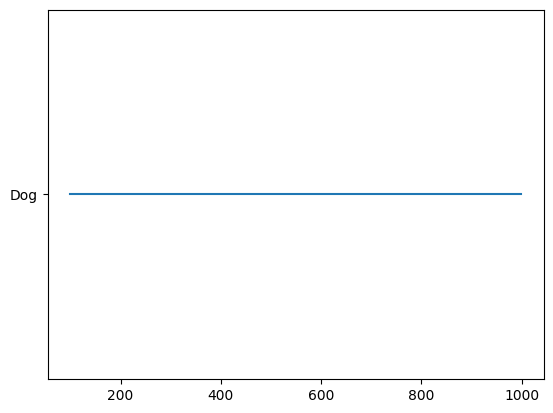

In [33]:
'''Time to plot your predictions'''
x = [x for x in range(100, 1000)]
predictions = clf_2.predict(x)
plt.plot([n for n in range(100, 1000)], predictions)

''' The plot should have one straight line of just Dog'''

##### Just checking if the code works correctly when there are more than one feature in the dataset

In [34]:
data_x1 = [[2, 7, 8, 10],
           [1, 2, 2, 4]]
data_y1 = ['good', 'bad', 'good', 'good']

In [35]:
clf_3 = Prior()
clf_3.fit(data_x1, data_y1)
print(clf_3.model_params)

{'good': 0.75, 'bad': 0.25}


#### Checking if model can be retrained without creating another instance

In [36]:
data_x1 = [2, 7, 8, 10]
data_y1 = ['even', 'odd', 'even', 'even']
data_x2 = [3, 5, 7, 8]
data_y2 = ['odd', 'odd', 'odd', 'even']

In [37]:
clf = Prior()
clf.fit(data_x1, data_y1)
print(clf.model_params)

{'even': 0.75, 'odd': 0.25}


In [38]:
test = [8, 7, 9, 2]
prediction = clf.predict(test)
print(prediction)

['even', 'even', 'even', 'even']


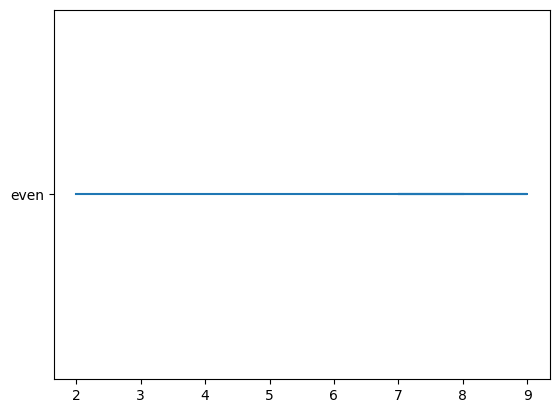

In [39]:
plt.plot(test, prediction)

In [40]:
'''now training created instance of classifier on the second data'''
clf.fit(data_x2, data_y2)
print(clf.model_params)

{'even': 0.25, 'odd': 0.75}


In [41]:
prediction = clf.predict(test)
print(prediction)

['odd', 'odd', 'odd', 'odd']


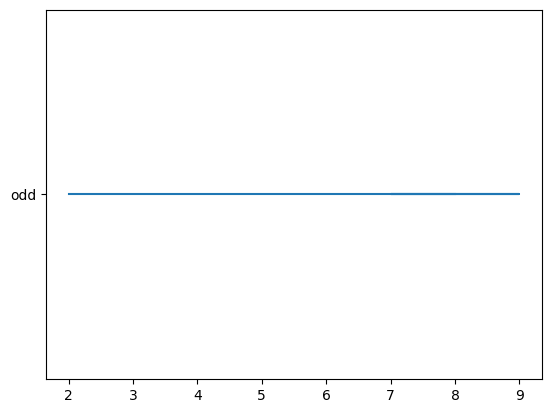

In [42]:
plt.plot(test, prediction)

The classifier was retrained on the second data without creating another instance of it. 


### Question 3
##### Lecture 4

In the markdown cell below, state what a prior, likelihood, and posterior probability is. I am looking for the probability formulation and quick definition. Example: If I asked to state what an evidence probability, I would expect to see P(x) and is the probability distribution of measuring a pattern with a specific value.

#### 1. Define the following probabilities in terms of a Bayesian Decision classifier:
P (ωj ), P (ωj |x), P (x|ωj ), P (x)

**Prior Probability, $P(\omega_j)$ :**
The prior probability of class **$ \omega_j $** represents the prior knowledge of how likely it is to get that class. It is calculated using the frequency of the class in the dataset before any observation is made.
$$
P(\omega_j) = \frac{\text{Number of samples in class } \omega_j }{\text{Total number of samples}}
$$

**Likelihood, P(x |$\omega_j$):** 
Likelihood represents the probability of observing **x**, given that it belongs to class **$ \omega_j $**. It describes the distribution of the data in each class.<br>
Example: It can be described as how frequently we can measure a pattern with feature value **x** given that the pattern belongs to class **$ \omega_j $**

**Evidence Probability, P(x) :**
The overall probability of observing **x** across all the classes. It is the probability distribution of measuring a pattern with the value x.<br>
Example: It can be described as how frequwntly a pattern is measured that has a feature value **x**.
$$
P(x) = \sum_{i=1}^{n} P(x |\omega_i) P(\omega_i), 
$$
n = number of classes

**Posterior Probability, P($ \omega_j $ | x):**   According to **Bayes theorem**, Posterior probability represents the probability of class **$ \omega_j $**, given the observed feature x. It quantifies how likely a pattern belongs to class **$ \omega_j $**, after considering the feature **x**.
$$
P( \omega_j  | x) = \frac{P(x | \omega_j) P(\omega_j)}{P(x)}
$$

#### 2. Explain why a prior classifier is “optimum”.

A prior classifier is considered as optimum when there is no other information or the feature data (x) available, because it favours the most likely class and reduces the overall error. In case of prior classifier, the error value is the minimum of probabilities of the classes. Also, it makes the same decision all the times. So, a prior classifier is optimum if there is no other information available.

$$
P(\text{error}) =
\begin{cases} 
P(\omega_1) & \text{if we decide } \omega_2 \\
P(\omega_2) & \text{if we decide } \omega_1
\end{cases}
$$

$$
P(\text{error}) = \min \big[P(\omega_1), P(\omega_2)\big]
$$

For example, if $$
P(\omega_1) = 0.7 \quad \text{and} \quad P(\omega_2) = 0.3
$$
then it will always predicts **$\omega_1$** because 70% of the data belongs to **$\omega_1$**. So the overall error is reduced.

#### 3. What makes a hypothesis function consistent and what is the difference between a specific and general hypothesis function?

A hypothesis function in the hypothesis space (H) is consistent if it fully explains and encompasses all the training samples. The space of all consistent hypotheses functions makes up the version space.<br>
**Specific vs. General Hypothesis:**
- A Specific hypothesis function is one of the extremes of the version space and is highly constrained rule that matches only a small subset of samples in the training data. It is highly sensitive to the training data.<br>
  **Example:** In a classification problem - lets say for the classification of animals (cats, dogs, foxes, horses), for identifying a cat, the specific hypothesis would be "The animal is a cat if it has four legs, fur, whiskers, and meows."
- A General hypothesis function is another extreme which is broader and applies to large number of samples. It is more flexible and generalizable.<br>
  **Example:** The general hypothesis for identifying a cat would be "The animal is a cat if it has four legs and fur.". This rule is more inclusive and could also include dogs, horses or other mammals.